In [42]:
import numpy as np
import os
import cv2 as cv
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  Conv2D,Dense, Input, InputLayer, Flatten,Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
import pydot_ng as pydot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [13]:
### Hyperparamters
IMGH=200
IMGW=200
EPOCHS=5
BATCHSIZE=512
datasetFolder=r'dataset'
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="/device:GPU:0" 

In [14]:
## Importing data
imgData=[]
labels=[]
for folder in os.listdir(datasetFolder):
    for filename in os.listdir(os.path.join(datasetFolder,folder)):
        imagePath=os.path.join(datasetFolder,folder,filename)
        image=cv.imread(imagePath,cv.COLOR_BGR2RGB)
        image=cv.resize(image, (IMGH, IMGW),interpolation = cv.INTER_AREA)
        image=np.array(image)
        image=image.astype('float32')
        image=image/255
        imgData.append(image)
        labels.append(folder)

In [4]:
print(imgData[0].shape)
print(labels[0:10])
target_dict={k: v for v, k in enumerate(np.unique(labels))}
labels=  [target_dict[labels[i]] for i in range(len(labels))]
labels[0:1]

(200, 200, 3)
['female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female', 'female']


[0]

In [5]:
## Train test split
Xtrain,Xtest,yTrain,yTest=train_test_split(imgData,labels,random_state=0,test_size=0.33)

In [19]:
target_dict={'male':0,'female':1}
classNames=['male','female']

In [15]:
### CNN
model=keras.Sequential()
model.add(InputLayer(input_shape=(IMGH,IMGW,3)))
model.add(Conv2D(filters=32,kernel_size=3,strides=(2, 2), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 99, 99, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 153664)            0         
                                                                 
 dense_1 (Dense)             (None, 2)                 307330    
                                                                 
 activation_1 (Activation)   (None, 2)                 0         
                                                                 
Total params: 326,722
Trainable params: 326,722
Non-trainable params: 0
_________________________________________________________________


In [16]:
### Complie the model
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
### Training 
model.fit(x=np.array(Xtrain),y=np.array(yTrain),validation_data=(np.array(Xtest),np.array(yTest)),epochs=EPOCHS,batch_size=BATCHSIZE,verbose=1)

Epoch 1/5
62/62 [==============================] - 145s 2s/step - loss: 1.0577 - accuracy: 0.6737 - val_loss: 0.4942 - val_accuracy: 0.7686
Epoch 2/5
62/62 [==============================] - 141s 2s/step - loss: 0.4432 - accuracy: 0.8066 - val_loss: 0.3358 - val_accuracy: 0.8653
Epoch 3/5
62/62 [==============================] - 141s 2s/step - loss: 0.4881 - accuracy: 0.8384 - val_loss: 0.2867 - val_accuracy: 0.8907
Epoch 4/5
62/62 [==============================] - 142s 2s/step - loss: 0.3820 - accuracy: 0.8543 - val_loss: 0.3027 - val_accuracy: 0.8906
Epoch 5/5
62/62 [==============================] - 148s 2s/step - loss: 0.3032 - accuracy: 0.8815 - val_loss: 0.2994 - val_accuracy: 0.8869


In [20]:
yPred=model.predict(np.array(Xtest))

In [33]:
yPred=np.argmax(yPred,axis=1)

In [35]:
print(classification_report(np.array(yTest), yPred, target_names=classNames))

              precision    recall  f1-score   support

        male       0.96      0.80      0.88      7654
      female       0.84      0.97      0.90      7859

    accuracy                           0.89     15513
   macro avg       0.90      0.89      0.89     15513
weighted avg       0.90      0.89      0.89     15513



In [43]:
df=confusion_matrix(np.array(yTest), yPred,labels=[0,1])

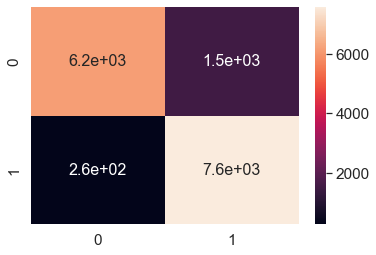

In [44]:
sn.set(font_scale=1.4) # for label size
sn.heatmap(df, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
tf.test.is_built_with_cuda()

In [12]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [13]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [15]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [16]:
tf.test.is_built_with_cuda()

True